<a href="https://colab.research.google.com/github/luuloi/GWAS_Introduction_2023/blob/main/04_GWAS_Case_Control_Associatetion_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case - Control Association Testing

## 1. Load data file into your R session

In [ ]:
## Read data
LHON = read.table("https://raw.githubusercontent.com/luuloi/GWAS_Introduction_2023/main/data/LHON.txt", header=TRUE, stringsAsFactors=TRUE)

In [ ]:
## View the first few lines of the LHON data
head(LHON)

,IID,GENO,PHENO
,<fct>,<fct>,<fct>
1,ID1,TT,CONTROL
2,ID2,CT,CONTROL
3,ID3,TT,CASE
4,ID4,CT,CONTROL
5,ID5,TT,CONTROL
6,ID6,TT,CONTROL


In [ ]:
## Get information about the types of variables in the LHON dataframe
str(LHON)

'data.frame':	328 obs. of  3 variables:
 $ IID  : Factor w/ 328 levels "ID1","ID10","ID100",..: 1 112 223 263 274 285 296 307 318 2 ...
 $ GENO : Factor w/ 3 levels "CC","CT","TT": 3 2 3 2 3 3 1 3 3 3 ...
 $ PHENO: Factor w/ 2 levels "CASE","CONTROL": 2 2 1 2 2 2 2 2 2 2 ...


In [ ]:
## Overall summary of LHON data
summary(LHON)

      IID      GENO         PHENO    
 ID1    :  1   CC: 16   CASE   : 89  
 ID10   :  1   CT: 74   CONTROL:239  
 ID100  :  1   TT:238                
 ID101  :  1                         
 ID102  :  1                         
 ID103  :  1                         
 (Other):322                         

In [ ]:
## Check number of columns and rows of data
dim(LHON)

[1] 328   3

In [ ]:
## Check for NA values
table(is.na(LHON))


FALSE 
  984 

In [ ]:
## Remove rows with NA values, if any exist
LHON <- LHON[rowSums(is.na(LHON)) == 0, ]
## Remove columns with NA values, if any exist (This can be potentially dangerous, I commented it out. Uncomment only if necessary.)
# LHON <- LHON[, colSums(is.na(LHON)) == 0]
dim(LHON)

[1] 328   3

## 2. Basic visualization

In [ ]:
# Load require package
library(ggplot2)

In [ ]:
# Summary number of genotypes and phenotyes
table(LHON$GENO)
table(LHON$PHENO)


 CC  CT  TT 
 16  74 238 


   CASE CONTROL 
     89     239 

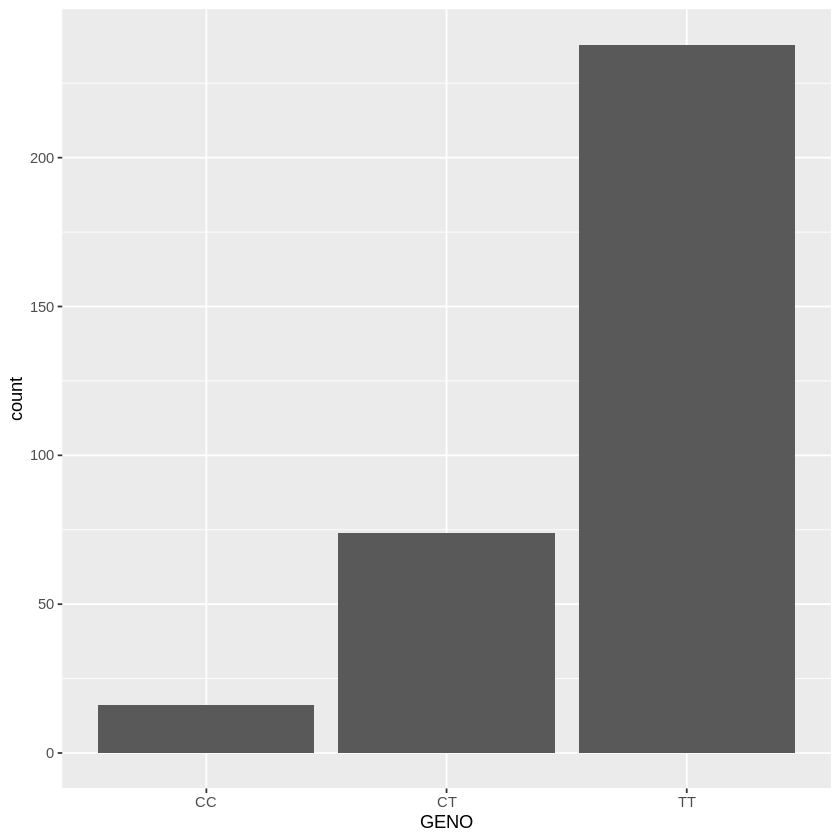

In [ ]:
# Basic barplot for genotype using ggplot2
ggplot(LHON, aes(x=GENO)) + geom_bar()

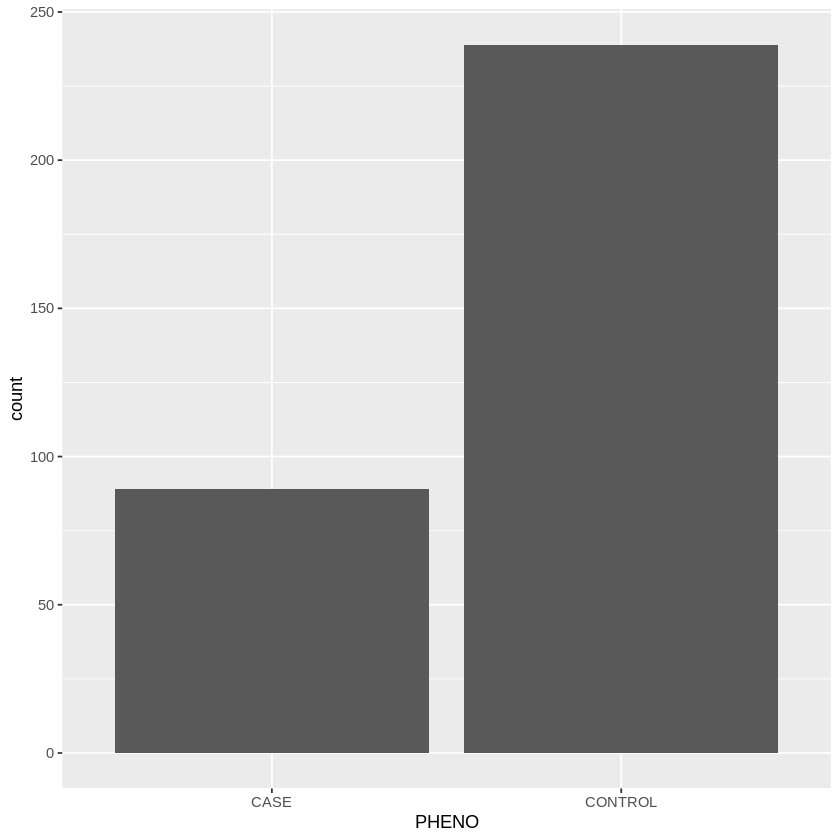

In [ ]:
# Phenotypes
ggplot(LHON, aes(x=PHENO)) + geom_bar()

In [ ]:
# Create a table with the count of genotypes and phenotypes
table(LHON$GENO, LHON$PHENO)
count_dt = as.data.frame(table(LHON$GENO, LHON$PHENO))
colnames(count_dt) = c("Geno", "Pheno", "Count")
count_dt

    
     CASE CONTROL
  CC    6      10
  CT    8      66
  TT   75     163

Geno,Pheno,Count
<fct>,<fct>,<int>
CC,CASE,6
CT,CASE,8
TT,CASE,75
CC,CONTROL,10
CT,CONTROL,66
TT,CONTROL,163


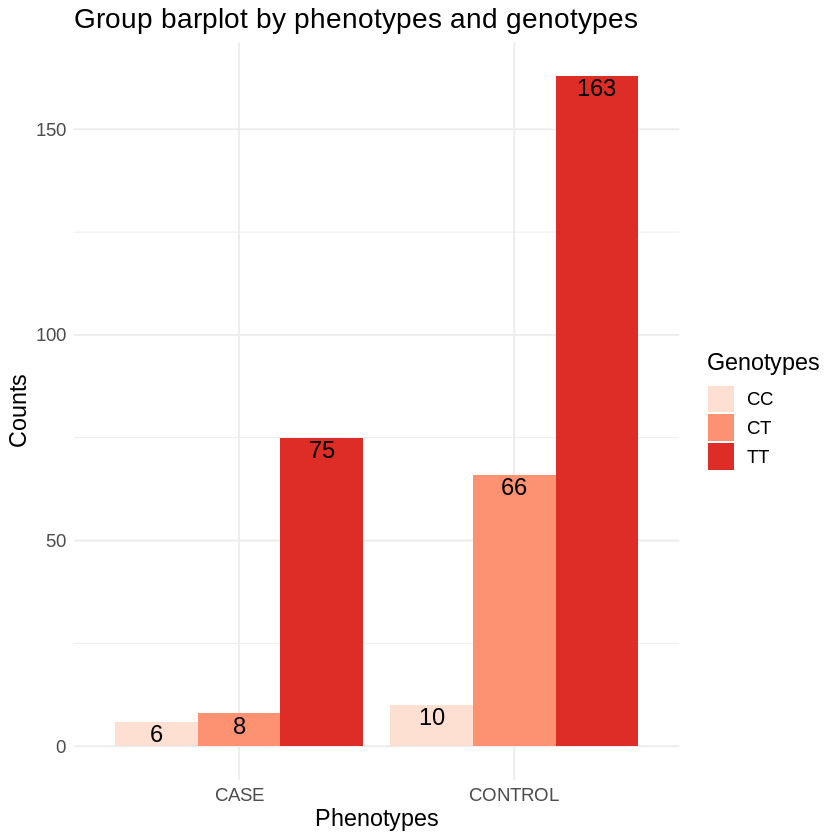

In [ ]:
# Create grouped barplots
ggplot(count_dt, aes(x = Pheno, y = Count, fill = Geno)) +
    geom_bar(stat = "identity", position = position_dodge()) +
    geom_text(aes(label = Count),
        vjust = 1.2,
        color = "black",
        position = position_dodge(0.9),
        size = 5
    ) +
    theme_minimal() +
    theme(text = element_text(size = 14)) +
    labs(title= "Group barplot by phenotypes and genotypes", fill = "Genotypes", y = "Counts", x = "Phenotypes") +
    scale_fill_brewer(palette = "Reds")

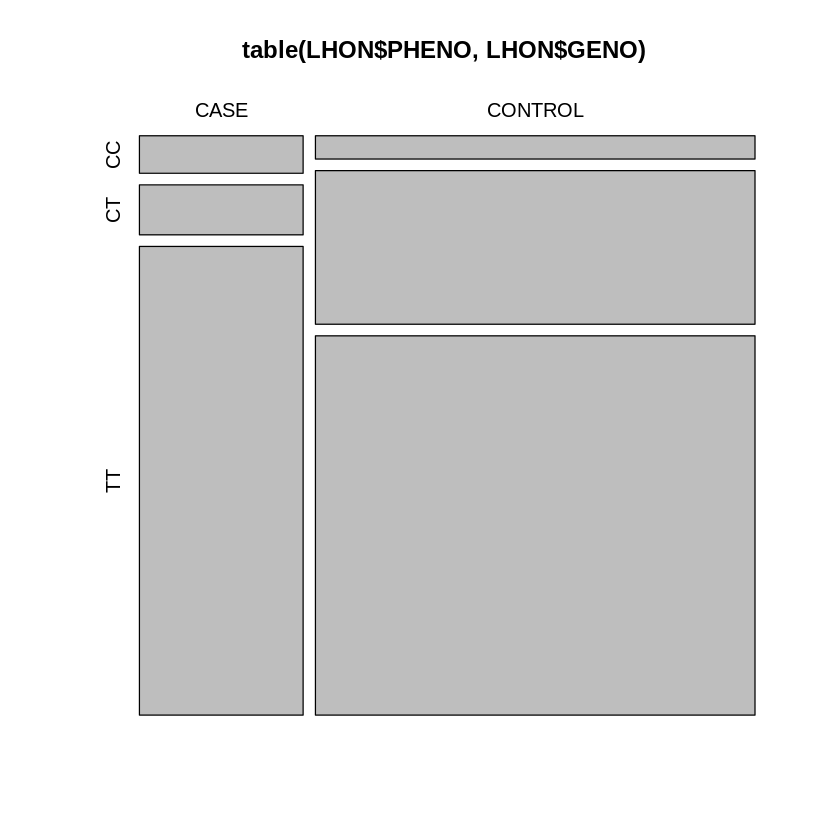

In [ ]:
# Create Mosaicplot: Genotypes and Phenotypes
mosaicplot(table(LHON$PHENO, LHON$GENO), cex = 1)

In [ ]:
# Perform Pearson's Chi-squared test between genotypes and phenotypes
table = as.data.frame.matrix(table(LHON$GENO, LHON$PHENO))
table
chisq.test(table)

,CASE,CONTROL
,<int>,<int>
CC,6,10
CT,8,66
TT,75,163


Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table
X-squared = 13.15, df = 2, p-value = 0.001395


## 3. Logistic regression

In [ ]:
# First create a 0 and 1 phenotype variable indicating Case/Control Status to perform the logistic regression analysis
LHON$newpheno=with(LHON,ifelse(PHENO=="CASE",1,0))
head(LHON)

,IID,GENO,PHENO,newpheno
,<fct>,<fct>,<fct>,<dbl>
1,ID1,TT,CONTROL,0
2,ID2,CT,CONTROL,0
3,ID3,TT,CASE,1
4,ID4,CT,CONTROL,0
5,ID5,TT,CONTROL,0
6,ID6,TT,CONTROL,0


## What would be the reference genotype for a logistic regression analysis?

In [ ]:
# Use the levels command in R. The first factor will be the reference genotype.
levels(LHON$GENO)

[1] "CC" "CT" "TT"

In [ ]:
# Perform the logistic regression analysis for this data
# with CC as the reference genotype
logistmod1=glm(newpheno~GENO,family=binomial(link="logit"),data=LHON)

In [ ]:
# View the summary results of the logistic regression model
# including parameter estimates and standard errors
summary(logistmod1)


Call:
glm(formula = newpheno ~ GENO, family = binomial(link = "logit"), 
    data = LHON)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -0.5108     0.5164  -0.989   0.3226  
GENOCT       -1.5994     0.6378  -2.508   0.0122 *
GENOTT       -0.2654     0.5349  -0.496   0.6197  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 383.49  on 327  degrees of freedom
Residual deviance: 368.48  on 325  degrees of freedom
AIC: 374.48

Number of Fisher Scoring iterations: 4


### Obtain odds ratios and confidence intervals for the CT and TT genotypes
### Can obtain the odds ratio (OR) estimates by exponentiating the coefficient estimates from the logistic regression model. What is the odds ratio for the CT genotype?

In [ ]:
# OR for CT genotype
exp(-1.5994)

[1] 0.2020177

### Can obtain a 95% confidence interval for the odds ratio parameter for the CT genotype use the standard error of the coefficient estimates from the logistic regression model

In [ ]:
# 95% CI for CT genotype
myse=1.96*(.6378)
CI=c(-1.5994-myse,-1.5994+myse)
exp(CI)

[1] 0.05787394 0.70517308

In [ ]:
# Odds ratio estimates and 95% CI for genotype TT
exp(-0.2654)

myse = 1.96*(0.5349)
CI = c(-0.2654-myse, -0.2654+myse)
exp(CI)

[1] 0.7668991

[1] 0.2687956 2.1880353

In [ ]:
# OR estimates and CI for all parameters
# in the logistic regression model
exp(coef(logistmod1))
exp(confint.default(logistmod1))

(Intercept)      GENOCT      GENOTT 
  0.6000000   0.2020202   0.7668712

,2.5 %,97.5 %
(Intercept),0.21806837,1.650858
GENOCT,0.05787424,0.705187
GENOTT,0.26878265,2.187981


## Logistic regression with TT as the reference genotype

In [ ]:
# Relevel genotype
LHON$NEWGENO = with(LHON, relevel(GENO, ref="TT"))
levels(LHON$NEWGENO)

[1] "TT" "CC" "CT"

In [ ]:
## Perform the logistic regression analysis TT as the reference genotype
logistmod2 = glm(newpheno~NEWGENO, family=binomial(link="logit"), data=LHON)
summary(logistmod2)


Call:
glm(formula = newpheno ~ NEWGENO, family = binomial(link = "logit"), 
    data = LHON)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.7763     0.1395  -5.563 2.64e-08 ***
NEWGENOCC     0.2654     0.5349   0.496 0.619739    
NEWGENOCT    -1.3340     0.3995  -3.339 0.000841 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 383.49  on 327  degrees of freedom
Residual deviance: 368.48  on 325  degrees of freedom
AIC: 374.48

Number of Fisher Scoring iterations: 4


In [ ]:
# OR estimates and CI for all parameters
# in the logistic regression model with TT as the reference genotype
exp(coef(logistmod2))
exp(confint.default(logistmod2))

(Intercept)   NEWGENOCC   NEWGENOCT 
  0.4601227   1.3040000   0.2634343

,2.5 %,97.5 %
(Intercept),0.3500310,0.6048404
NEWGENOCC,0.4570423,3.7204782
NEWGENOCT,0.1203945,0.5764187


## Why are the odds ratios different for CT now?


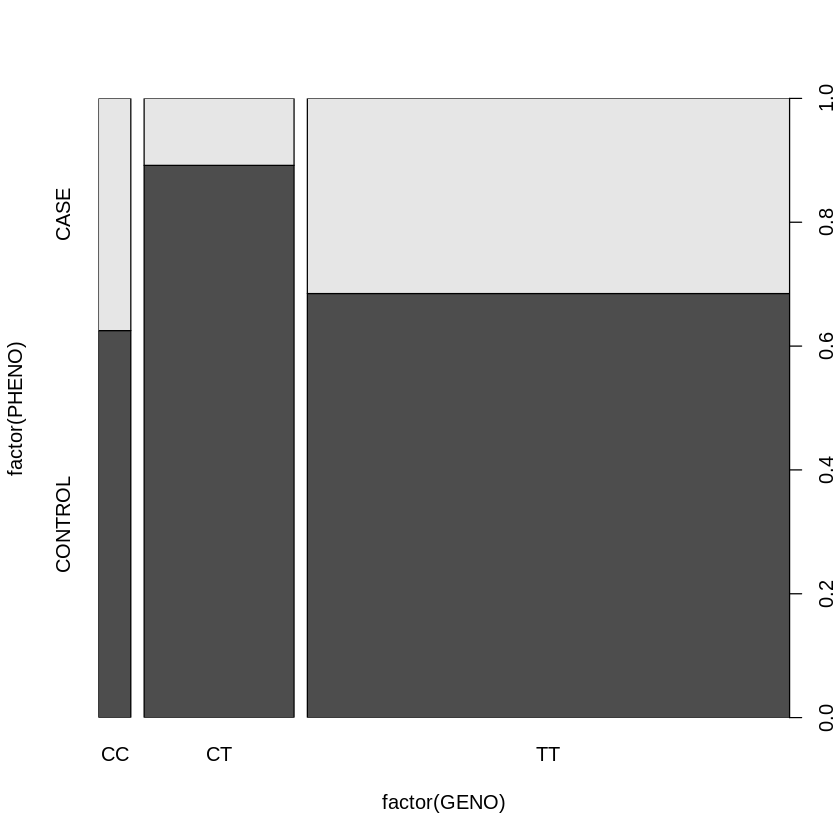

In [ ]:
# Ref genotype: CC -> TT ( much larger)
# Increase the precision of the estimate of the effect
plot(factor(PHENO)~factor(GENO), data=LHON)

## Can also conduct a logistic regression based on an additive logistic regression model.

In [ ]:
# First create a genotype variable with an additive coding based on the counts of the number of T alleles
LHON$genoadd <- with(LHON, 0 + 1*(GENO=="CT") + 2*(GENO=="TT"))
head(LHON)

,IID,GENO,PHENO,newpheno,NEWGENO,genoadd
,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,ID1,TT,CONTROL,0,TT,2
2,ID2,CT,CONTROL,0,CT,1
3,ID3,TT,CASE,1,TT,2
4,ID4,CT,CONTROL,0,CT,1
5,ID5,TT,CONTROL,0,TT,2
6,ID6,TT,CONTROL,0,TT,2


In [ ]:
# Perform logistic regression analysis with the additive genotype coding
logistmod3 = glm(newpheno~genoadd, family=binomial(link ="logit"), data=LHON)
summary(logistmod3)


Call:
glm(formula = newpheno ~ genoadd, family = binomial(link = "logit"), 
    data = LHON)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.8077     0.4554  -3.970  7.2e-05 ***
genoadd       0.4787     0.2505   1.911   0.0559 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 383.49  on 327  degrees of freedom
Residual deviance: 379.47  on 326  degrees of freedom
AIC: 383.47

Number of Fisher Scoring iterations: 4


In [ ]:
# Obtain the odds ratio estimates and confidence intervale
# for all paramaters in the logistic regression model
exp(coef(logistmod3))
exp(confint.default(logistmod3))

(Intercept)     genoadd 
  0.1640322   1.6140439

,2.5 %,97.5 %
(Intercept),0.06718883,0.4004616
genoadd,0.98792490,2.6369796


# 4. Logistic regression model

In [ ]:
# Ensure pacman is installed and loaded
if (!require("pacman")) install.packages("pacman")
library("pacman")

# Install caret package
pacman::p_load("caret")

# loading library
library(caret)

Loading required package: pacman

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pacman’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future’, ‘future.apply’, ‘lava’, ‘prodlim’, ‘clock’, ‘ipred’, ‘ModelMetrics’, ‘recipes’



caret installed



In [ ]:
set.seed(123)

In [ ]:
# Setup train and test data
index <- createDataPartition(LHON$PHENO, p = 0.80, list = FALSE)

In [ ]:
# 80% of data for training
trainDT = LHON[index, ]
table(trainDT$PHENO)


   CASE CONTROL 
     72     192 

In [ ]:
# Select 20% of the data for testing
testDT = LHON[-index, ]
table(testDT$PHENO)


   CASE CONTROL 
     17      47 

In [ ]:
# Build logistic model
logis <- glm(PHENO ~ genoadd, data = trainDT, family=binomial(link="logit"))
summary(logis)


Call:
glm(formula = PHENO ~ genoadd, family = binomial(link = "logit"), 
    data = trainDT)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   2.1103     0.5376   3.925 8.67e-05 ***
genoadd      -0.6550     0.2927  -2.238   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 309.38  on 263  degrees of freedom
Residual deviance: 303.58  on 262  degrees of freedom
AIC: 307.58

Number of Fisher Scoring iterations: 4


`geom_smooth()` using formula = 'y ~ x'


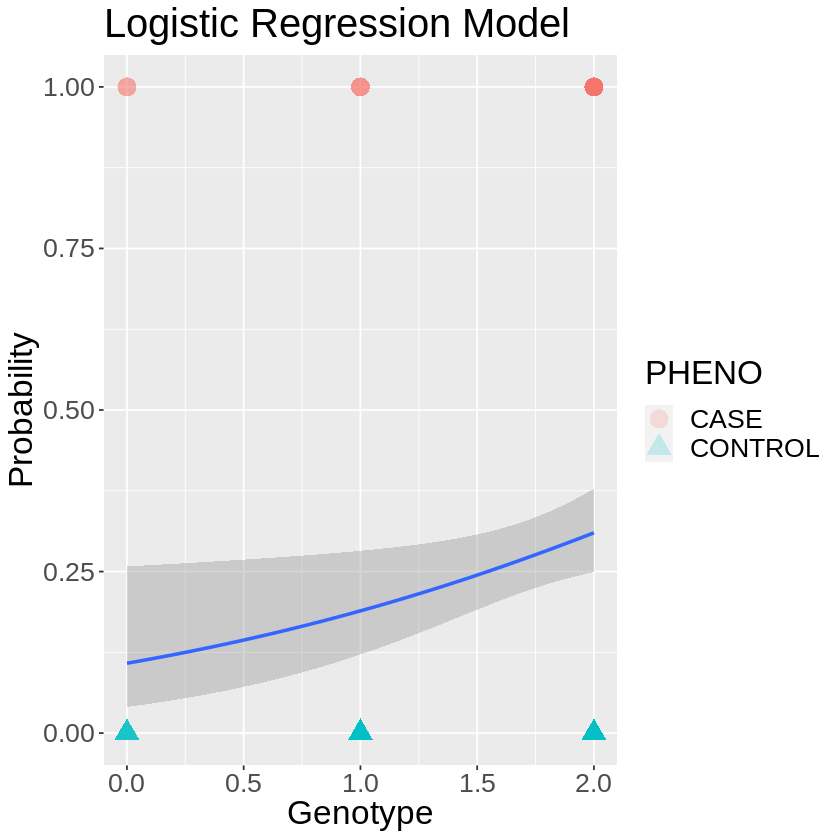

In [ ]:
# How train data look like?
ggplot(trainDT) +
  geom_point(aes(genoadd, newpheno, color = PHENO, shape = PHENO), alpha = 0.2, size = 5) +
  geom_smooth(aes(genoadd, newpheno), method = "glm", method.args = list(family = "binomial")) +
  labs(
    title = "Logistic Regression Model", x = "Genotype",
    y = "Probability"
  ) +
  theme(text = element_text(size = 20))

In [ ]:
# Prediction
testDT$pred = predict(logis, testDT, type = "response")
head(testDT)

,IID,GENO,PHENO,newpheno,NEWGENO,genoadd,pred
,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>
3,ID3,TT,CASE,1,TT,2,0.6900341
19,ID19,TT,CONTROL,0,TT,2,0.6900341
23,ID23,CT,CONTROL,0,CT,1,0.8108084
34,ID34,TT,CONTROL,0,TT,2,0.6900341
41,ID41,TT,CASE,1,TT,2,0.6900341
47,ID47,TT,CONTROL,0,TT,2,0.6900341


`geom_smooth()` using formula = 'y ~ x'


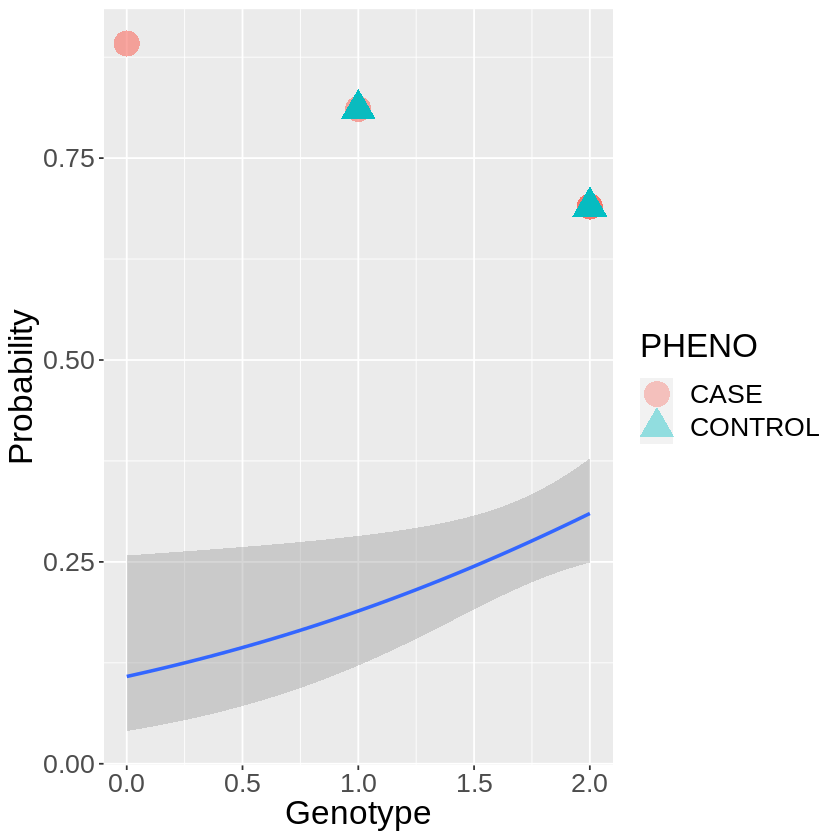

In [ ]:
# How predicted scores look like?
ggplot() +
  geom_smooth(aes(trainDT$genoadd, trainDT$newpheno),
    method = "glm",
    method.args = list(family = "binomial")) +
  geom_point(aes(testDT$genoadd, testDT$pred,
    shape = testDT$PHENO,
    color = testDT$PHENO
  ), alpha = 0.4, size = 7) +
  labs(
    x = "Genotype", y = "Probability",
    color = "PHENO", shape = "PHENO"
  ) +
  theme(text = element_text(size = 20))

In [ ]:
# Classifying
cutoff = 0.5
testDT$pred.pheno <- ifelse(testDT$pred > cutoff, "CONTROL", "CASE")
table(testDT$pred.pheno)


CONTROL 
     64 

In [ ]:
# Translate predicted scores into binary class
testDT$pred.class <- ifelse(testDT$pred > cutoff, 1, 0)
head(testDT)

,IID,GENO,PHENO,newpheno,NEWGENO,genoadd,pred,pred.pheno,pred.class
,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<dbl>
3,ID3,TT,CASE,1,TT,2,0.6900341,CONTROL,1
19,ID19,TT,CONTROL,0,TT,2,0.6900341,CONTROL,1
23,ID23,CT,CONTROL,0,CT,1,0.8108084,CONTROL,1
34,ID34,TT,CONTROL,0,TT,2,0.6900341,CONTROL,1
41,ID41,TT,CASE,1,TT,2,0.6900341,CONTROL,1
47,ID47,TT,CONTROL,0,TT,2,0.6900341,CONTROL,1


`geom_smooth()` using formula = 'y ~ x'


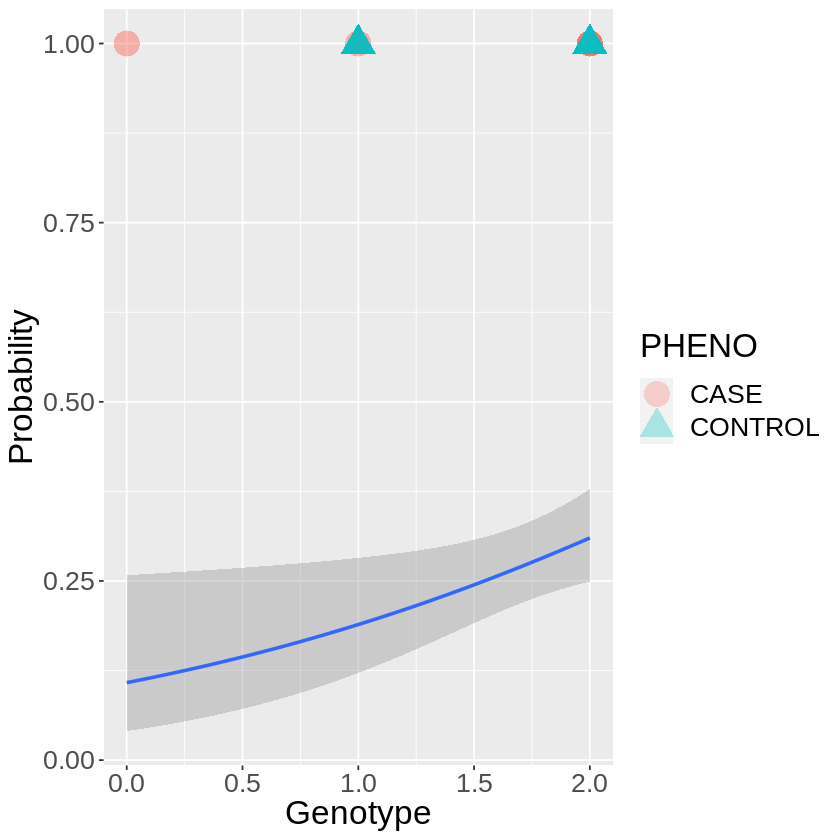

In [ ]:
# How classified test data at cutoff 0.5 look like?
ggplot() +
  geom_smooth(aes(trainDT$genoadd, trainDT$newpheno),
    method = "glm",
    method.args = list(family = "binomial")
  ) +
  geom_point(aes(testDT$genoadd, testDT$pred.class,
    shape = testDT$PHENO,
    color = testDT$PHENO
  ), alpha = 0.3, size = 7) +
  labs(
    x = "Genotype", y = "Probability",
    color = "PHENO", shape = "PHENO"
  ) +
  theme(text = element_text(size = 20))

In [ ]:
# Confusion matrix
confusionMatrix(factor(testDT$pred.pheno),
                factor(testDT$PHENO))

Warning message in confusionMatrix.default(factor(testDT$pred.pheno), factor(testDT$PHENO)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction CASE CONTROL
   CASE       0       0
   CONTROL   17      47
                                         
               Accuracy : 0.7344         
                 95% CI : (0.6091, 0.837)
    No Information Rate : 0.7344         
    P-Value [Acc > NIR] : 0.5647892      
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : 0.0001042      
                                         
            Sensitivity : 0.0000         
            Specificity : 1.0000         
         Pos Pred Value :    NaN         
         Neg Pred Value : 0.7344         
             Prevalence : 0.2656         
         Detection Rate : 0.0000         
   Detection Prevalence : 0.0000         
      Balanced Accuracy : 0.5000         
                                         
       'Positive' Class : CASE           
                                   

In [ ]:
# Sens and Spec
cm <- confusionMatrix(factor(testDT$pred.pheno),
                      factor(testDT$PHENO)
)$table

sensitivity <- cm[2, 2] / (cm[2, 2] + cm[1, 2])
sensitivity
specificity <- cm[1, 1] / (cm[1, 1] + cm[2, 1])
specificity

Warning message in confusionMatrix.default(factor(testDT$pred.pheno), factor(testDT$PHENO)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


[1] 1

[1] 0

In [ ]:
# Install precrec package
pacman::p_load("precrec")

# loading library
library(precrec)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘assertthat’, ‘gridExtra’



precrec installed



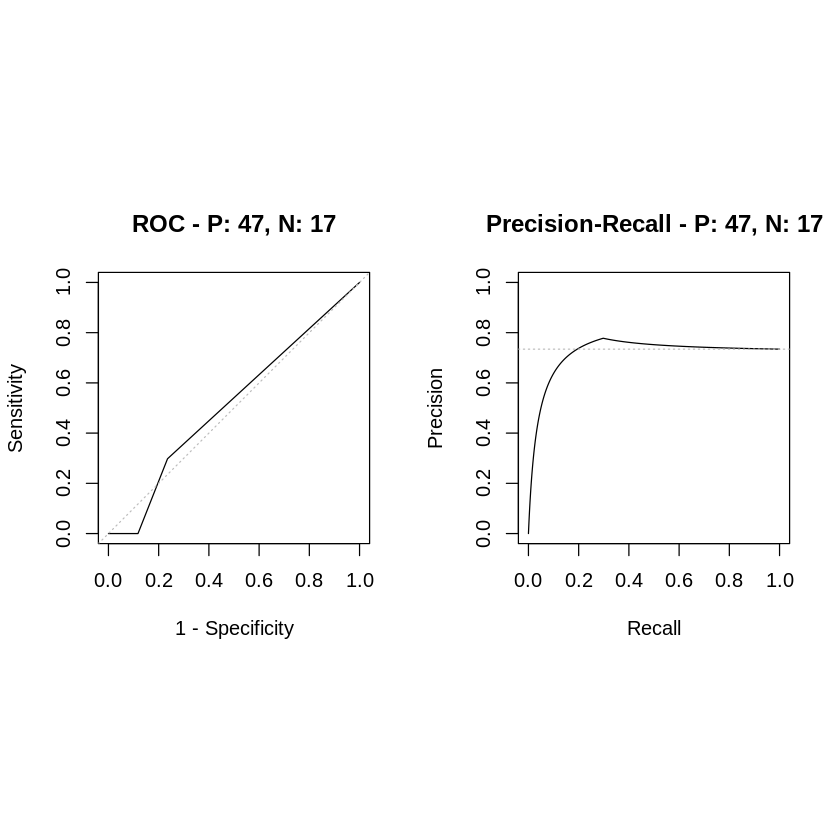

In [ ]:
# Calculate ROC and Precision-Recall curves
ROCnPR <- evalmod(scores = testDT$pred, labels = testDT$PHENO)
plot(ROCnPR)

Warning message:
“patchwork is not installed. grid and gridExtra will be used instead.”


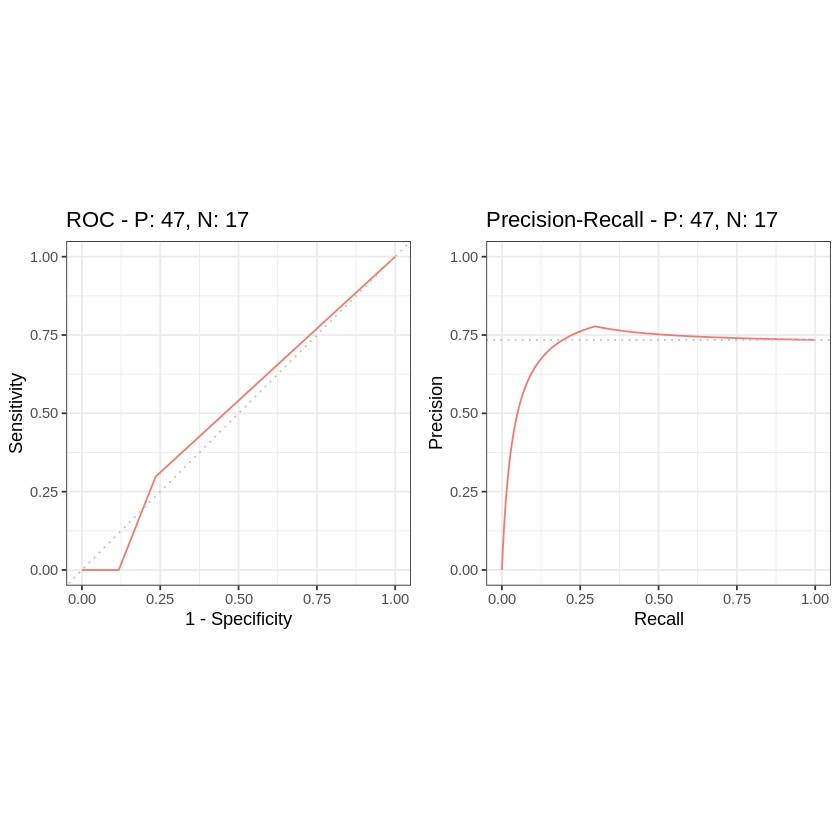

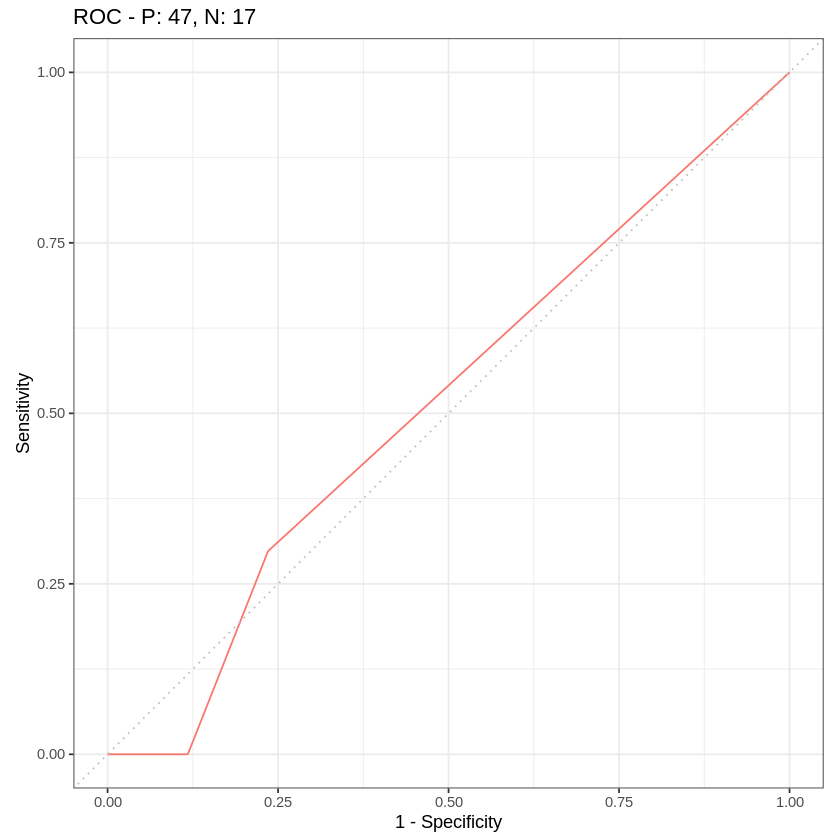

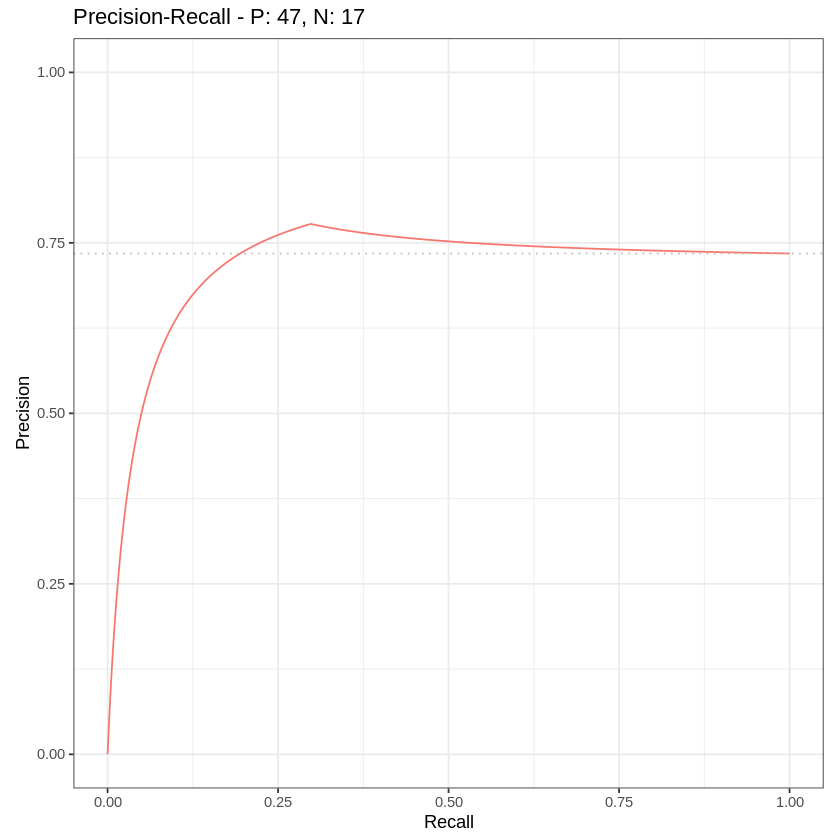

In [ ]:
# ROC curve and PRC curve
autoplot(ROCnPR)
autoplot(ROCnPR, "ROC")
autoplot(ROCnPR, "PRC")

In [ ]:
# AUC
aucs <- auc(ROCnPR)
aucs

modnames,dsids,curvetypes,aucs
<chr>,<dbl>,<chr>,<dbl>
m1,1,ROC,0.5137672
m1,1,PRC,0.7137974


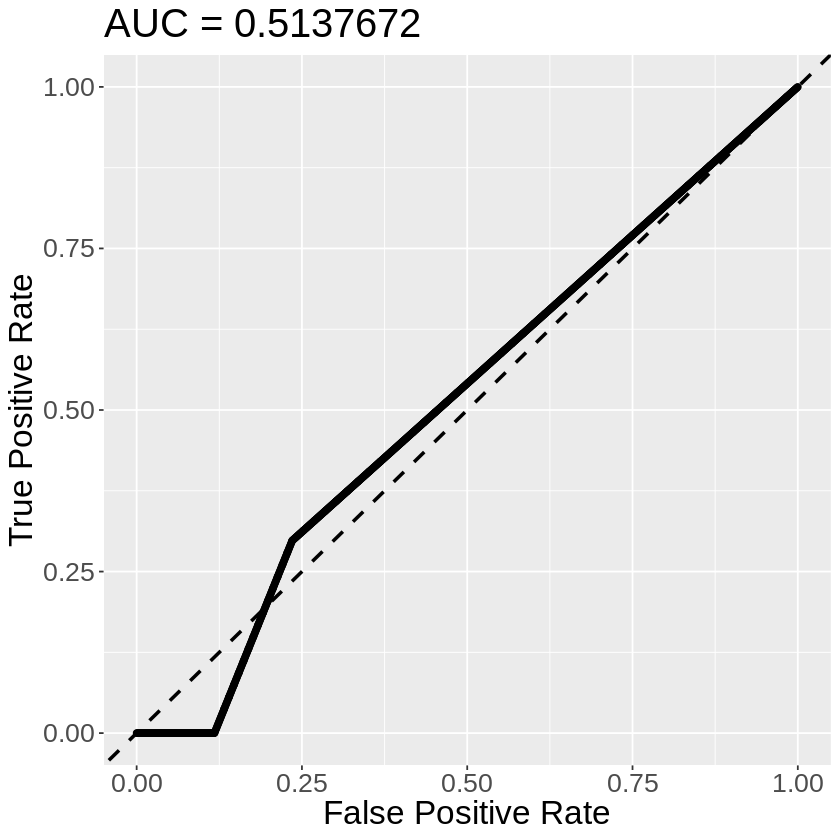

In [ ]:
# ggplot ROC
dt.roc <- as.data.frame(ROCnPR)[as.data.frame(ROCnPR)$type == "ROC", ]
ggplot(dt.roc, aes(x = x, y = y)) +
  geom_path(size = 2) +
  geom_point() +
  labs(x = "False Positive Rate", y = "True Positive Rate", title = "AUC = 0.5137672") +
  xlim(0, 1) +
  ylim(0, 1) +
  geom_abline(intercept = 0, slope = 1, size = 1, linetype = 2) +
  theme(text = element_text(size = 20))

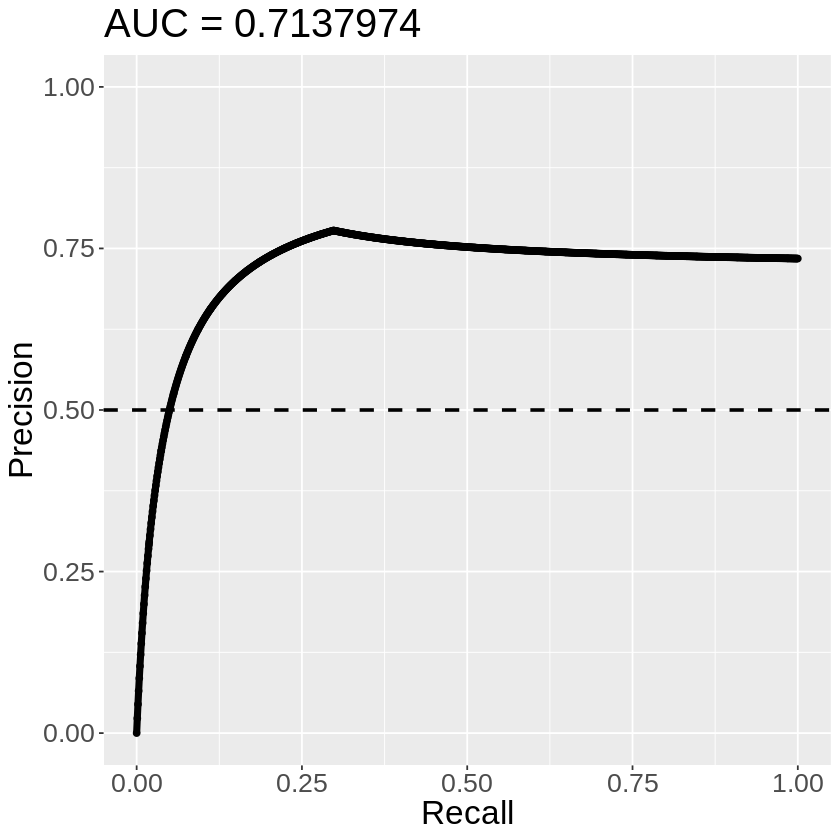

In [ ]:
# ggplot PR
dt.pr <- as.data.frame(ROCnPR)[as.data.frame(ROCnPR)$type == "PRC", ]
ggplot(dt.pr, aes(x = x, y = y)) +
  geom_path(size = 2) +
  geom_point() +
  labs(x = "Recall", y = "Precision", title = "AUC = 0.7137974") +
  xlim(0, 1) +
  ylim(0, 1) +
  geom_hline(yintercept = 0.5, size = 1, linetype = 2) +
  theme(text = element_text(size = 20))